# Lab 4 - part2
### Edge Detection

https://github.com/scikit-image/scikit-image/blob/master/skimage/filters/edges.py

http://scikit-image.org/docs/0.11.x/auto_examples/plot_edge_filter.html

http://scikit-image.org/docs/dev/auto_examples/edges/plot_canny.html



In [2]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
'''
1. Built-in Sobel, Prewill, Roberts, Canny
2. Custom Sobel (V-H-Both)
3. Custom LoG
'''

'\n1. Built-in Sobel, Prewill, Roberts, Canny\n2. Custom Sobel (V-H-Both)\n3. Custom LoG\n'

191 12


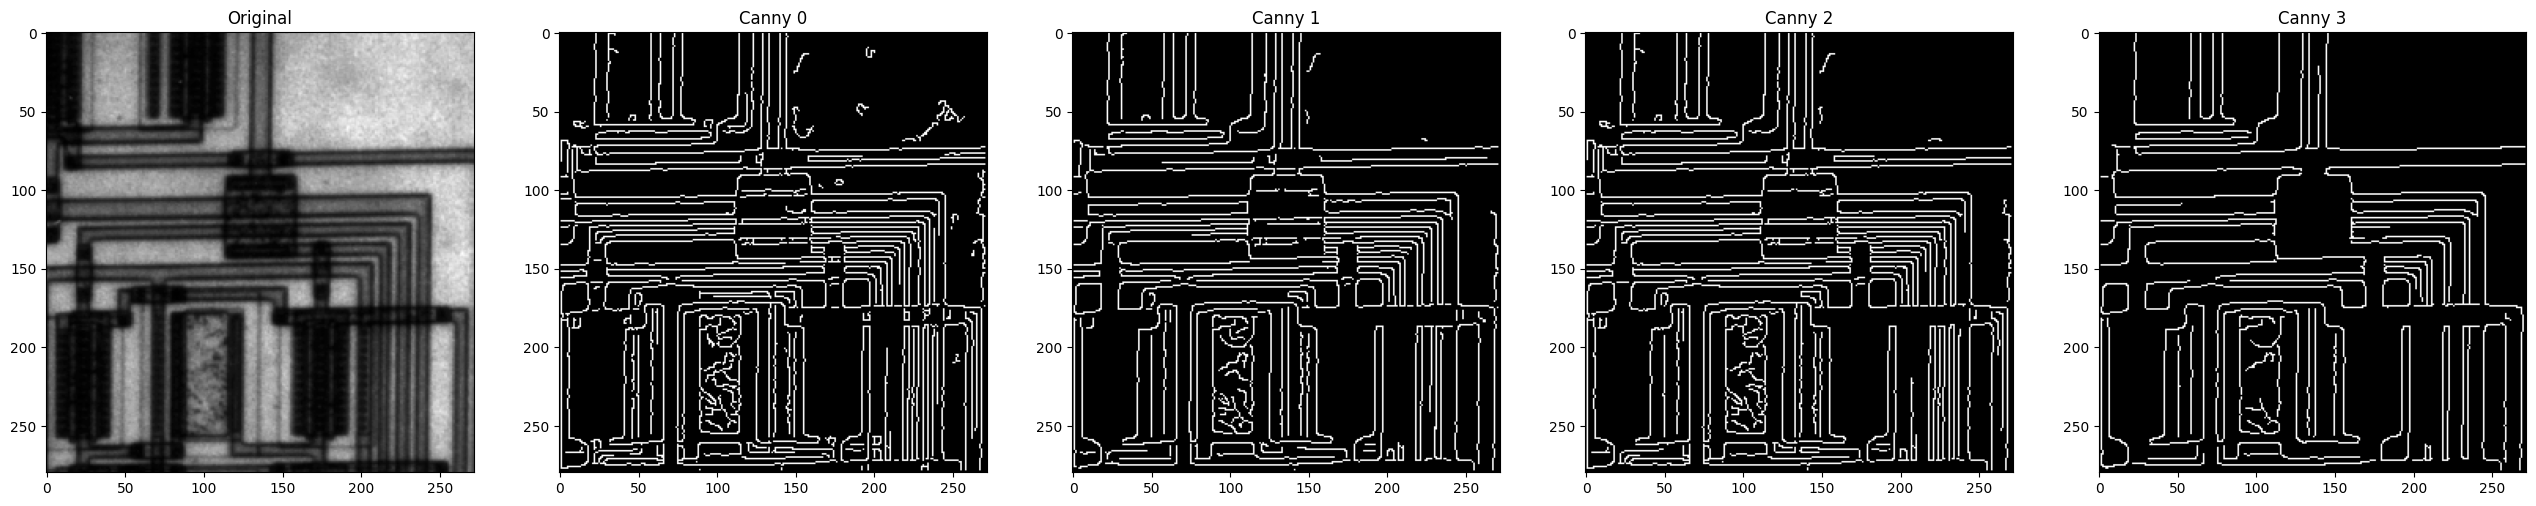

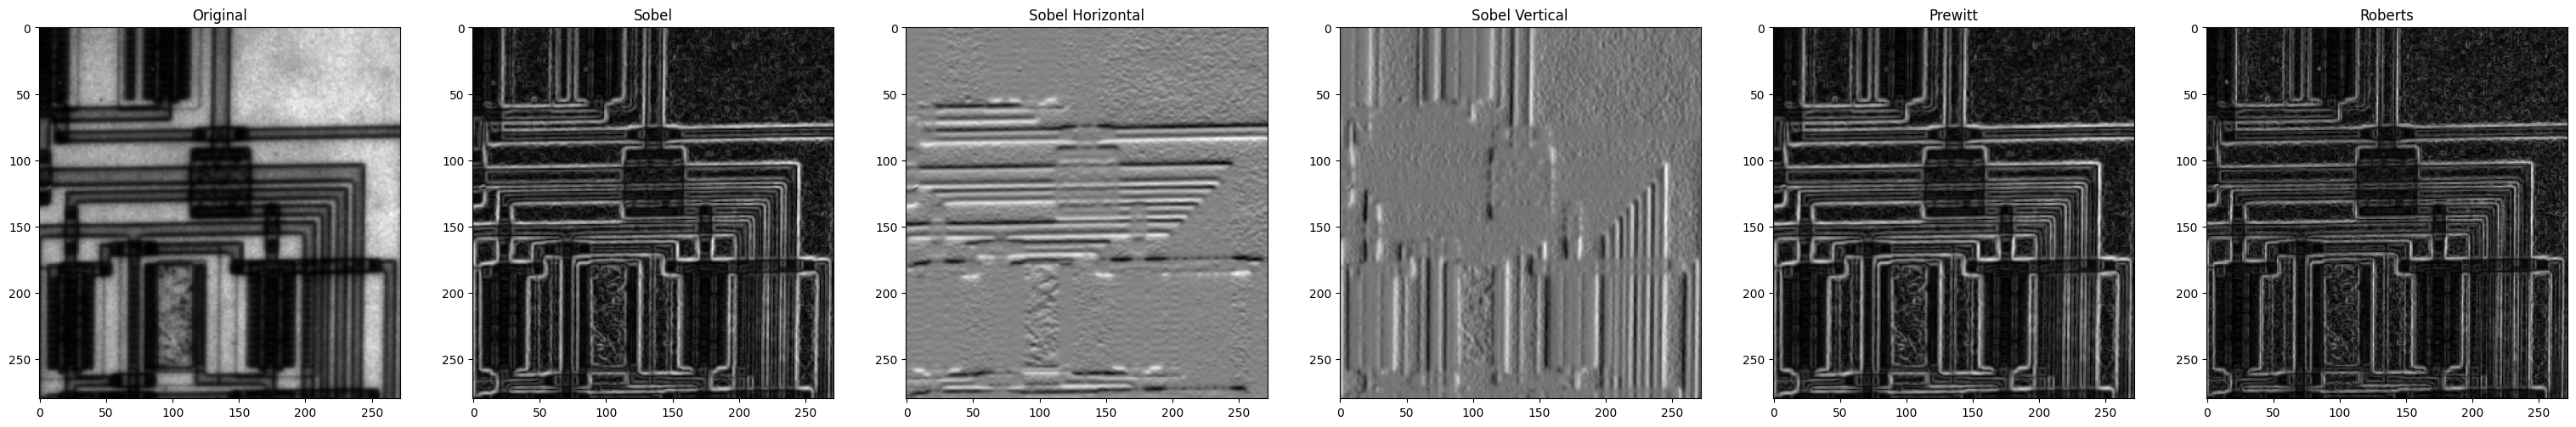

In [99]:
# 1. Built-in Sobel, Prewill, Roberts, Canny

## this one does not work ##
# img = rgb2gray(io.imread('circuit.tif'))
## So I read this ##
img = io.imread('circuit.tif', as_gray=True)

print(img.max(), img.min())

sobel_img = sobel(img)
sobel_img_h = sobel_h(img)
sobel_img_v = sobel_v(img)
prewitt_img = prewitt(img)
roberts_img = roberts(img)

canny_0 = canny(img, sigma=1)
canny_1 = canny(img, sigma=1.35)
canny_2 = canny(img, sigma=1, low_threshold=30, high_threshold=65)
canny_3 = canny(img, sigma=1.5, low_threshold=30, high_threshold=65)

# Display results
show_images(
    [img, canny_0, canny_1, canny_2, canny_3],
    ['Original', 'Canny 0', 'Canny 1', 'Canny 2', 'Canny 3']
)

# sigma removes noise by blurring, higher low_threshold and higher_high_threshold result in fewer edges, while vice versa

show_images([img, sobel_img, sobel_img_h, sobel_img_v, prewitt_img, roberts_img],
            ['Original', 'Sobel', 'Sobel Horizontal', 'Sobel Vertical', 'Prewitt', 'Roberts'])

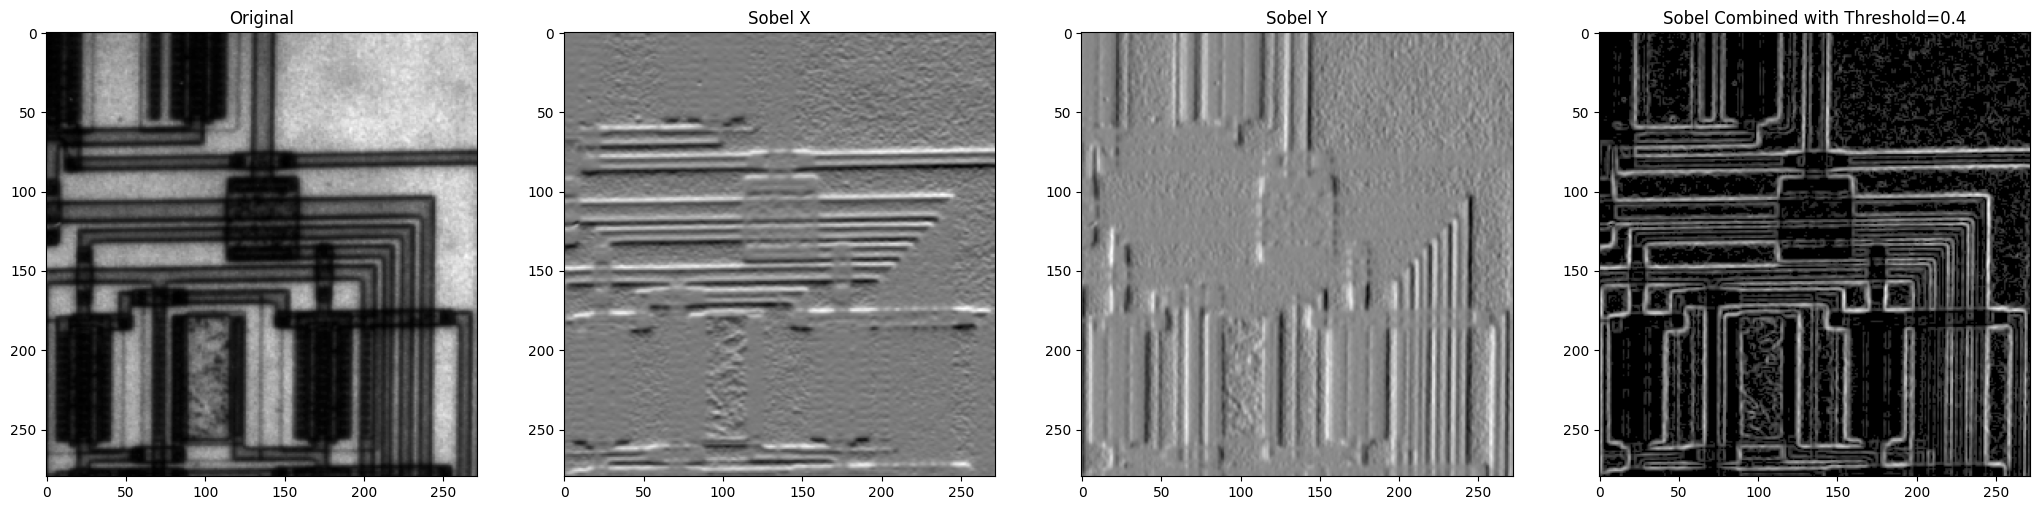

In [112]:
# 2. Custom Sobel (V-H-Both)
from scipy.ndimage import convolve

def sobel_edge_detection_gray(img, threshold=0.4):
    img = img.copy().astype(float)

    hx = np.array([[-1, -2, -1],
                   [ 0,  0,  0],
                   [ 1,  2,  1]], dtype=float)

    hy = np.array([[-1,  0,  1],
                   [-2,  0,  2],
                   [-1,  0,  1]], dtype=float)

    Gx = convolve2d(img, hx, mode='same', boundary='symm')
    Gy = convolve2d(img, hy, mode='same', boundary='symm')

    G = np.sqrt(Gx**2 + Gy**2)

    G_thresh = np.where(G > threshold, G, 0.0)

    return Gx, Gy, G_thresh

Gx, Gy, G_thresh = sobel_edge_detection_gray(img, threshold=40)
show_images([img, Gx, Gy, G_thresh],
            ['Original', 'Sobel X', 'Sobel Y', f'Sobel Combined with Threshold={0.4}'])

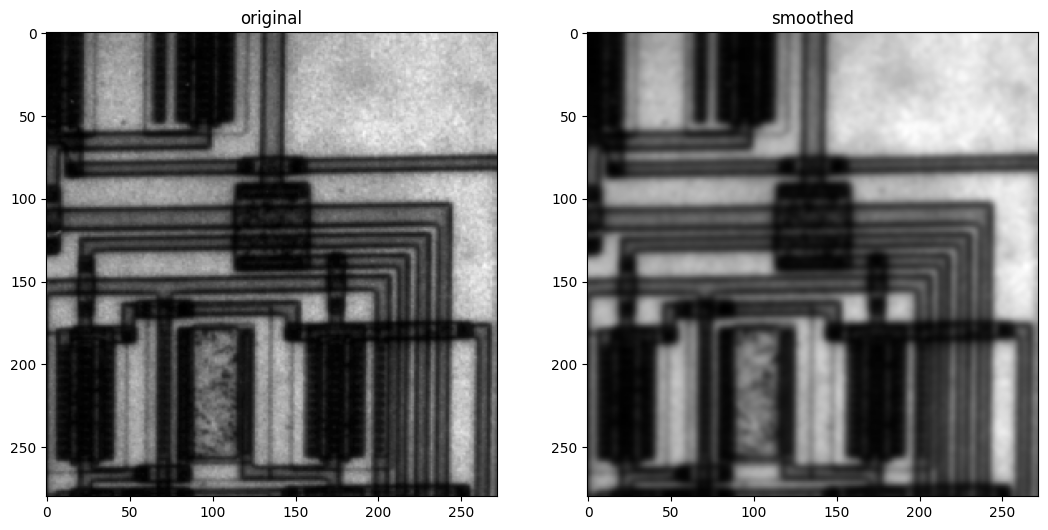

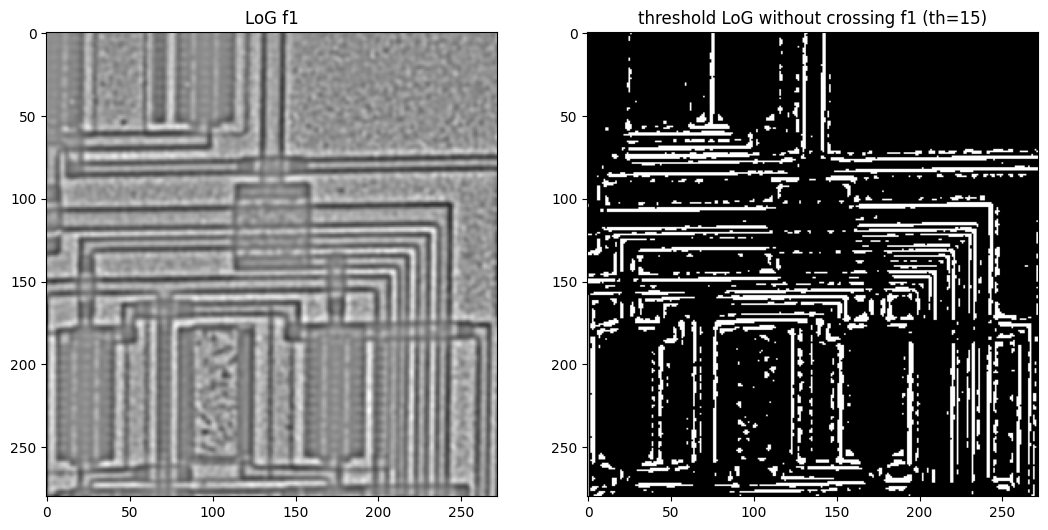

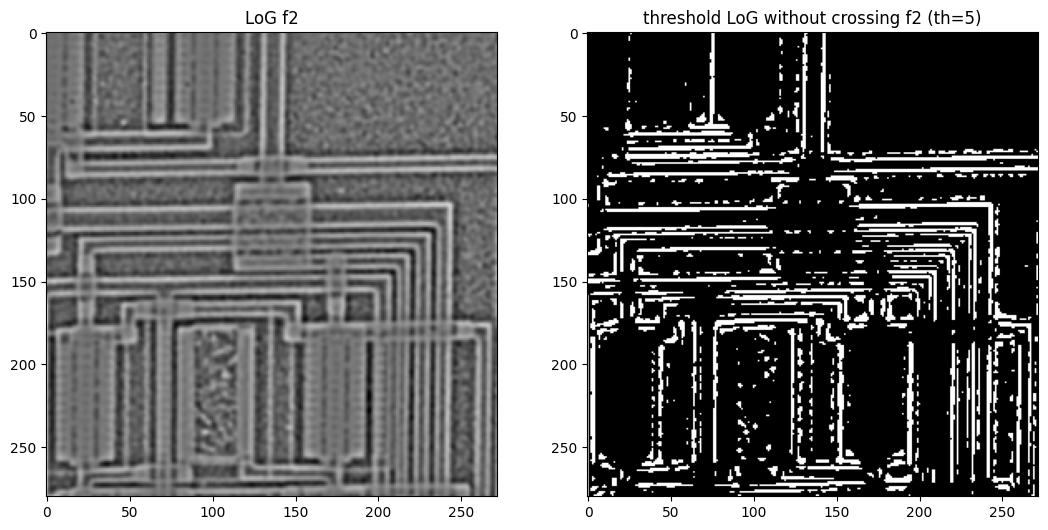

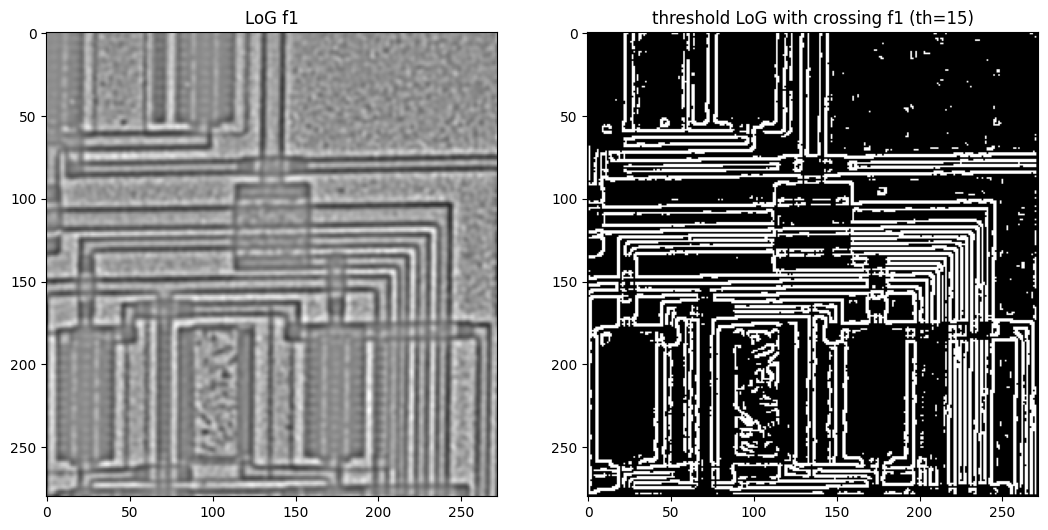

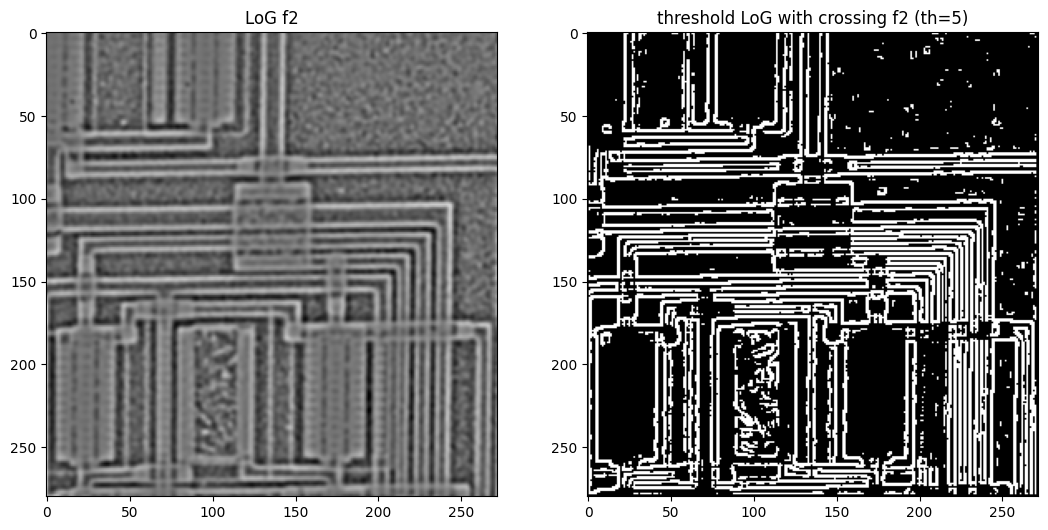

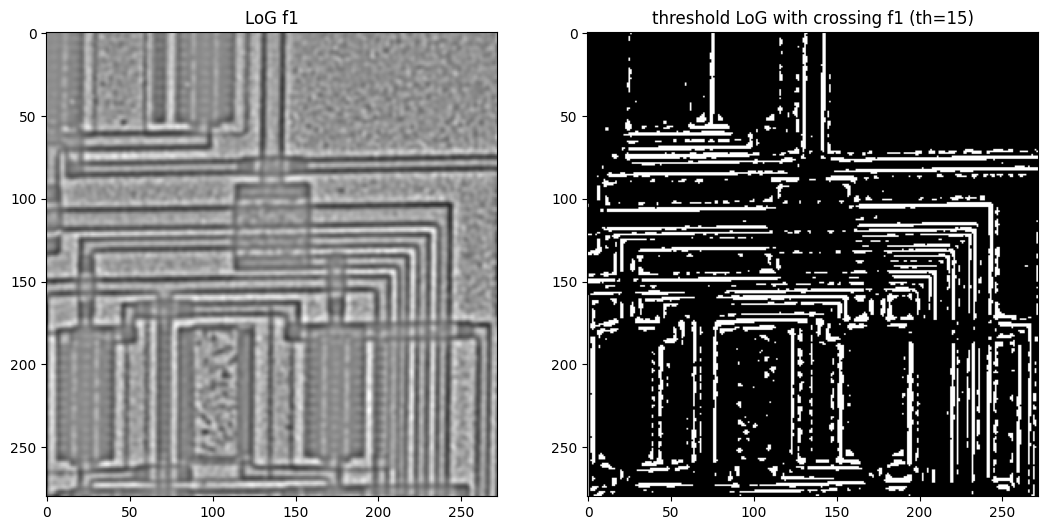

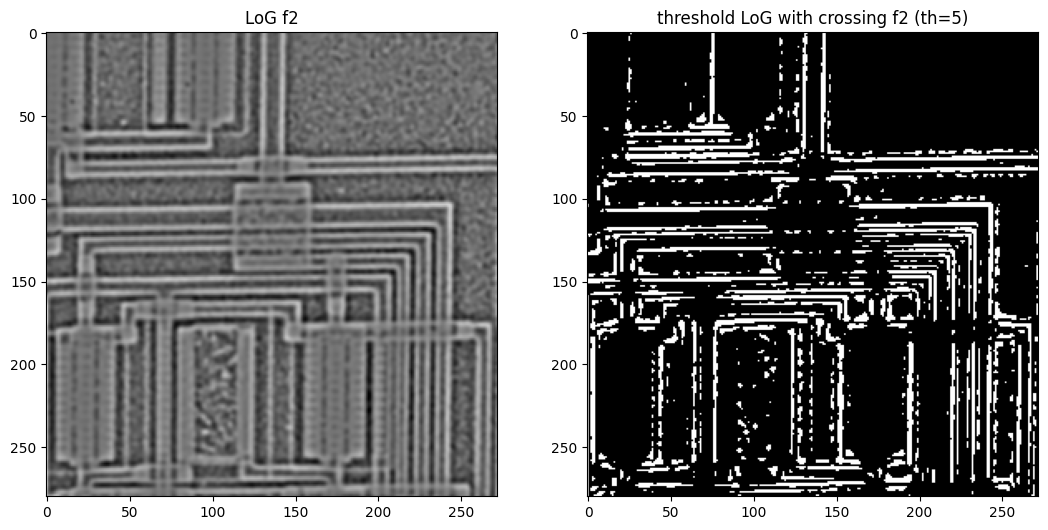

In [131]:
# 3. Custom LoG

from skimage.filters import gaussian

def zero_crossing_detection(log_img: np.ndarray, thres):
    zero_crossing_img = np.zeros(log_img.shape,dtype=np.uint8)
    for i in range(1, log_img.shape[0] - 1):
        for j in range(1, log_img.shape[1] - 1):
            patch = log_img[i-1:i+2, j-1:j+2]

            min_val = patch.min()
            max_val = patch.max()

            if (min_val < 0 and max_val > 0) and (max_val - min_val > thres):
                zero_crossing_img[i, j] = 255 
    return zero_crossing_img

def LoG(img: np.ndarray, sigma: float, threshold1: float, threshold2: float):
    img_copy = img.copy().astype(float)
    
    img_smoothed = gaussian(img_copy, sigma=sigma)

    f1 = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]], dtype=float)

    f2 = np.array([[ 0,  1,  0],
                   [ 1, -4,  1],
                   [ 0,  1,  0]], dtype=float)

    img_f1 = convolve(img_smoothed, f1, mode='reflect')
    img_f2 = convolve(img_smoothed, f2, mode='reflect')

    zero_crossing_img_f1 = zero_crossing_detection(img_f1, threshold1)
    zero_crossing_img_f2 = zero_crossing_detection(img_f2, threshold2)

    img_f1_without_crossing_thresh = np.where(abs(img_f1) > threshold1, 1.0, 0.0)
    img_f2_without_crossing_thresh = np.where(abs(img_f2) > threshold2, 1.0, 0.0)

    img_f1_with_crossing_thresh = np.where(abs(img_f1) > threshold1, 1.0, 0.0)
    img_f2_with_crossing_thresh = np.where(abs(img_f2) > threshold2, 1.0, 0.0)

    show_images([img, img_smoothed],
                ['original', 'smoothed'])

    show_images([img_f1, img_f1_without_crossing_thresh],
                ['LoG f1', f'threshold LoG without crossing f1 (th={threshold1})'])
    show_images([img_f2, img_f2_without_crossing_thresh],
                ['LoG f2', f'threshold LoG without crossing f2 (th={threshold2})'])

    show_images([img_f1, zero_crossing_img_f1],
                ['LoG f1', f'threshold LoG with crossing f1 (th={threshold1})'])
    show_images([img_f2, zero_crossing_img_f2],
                ['LoG f2', f'threshold LoG with crossing f2 (th={threshold2})'])

    show_images([img_f1, img_f1_with_crossing_thresh],
                ['LoG f1', f'threshold LoG with crossing f1 (th={threshold1})'])
    show_images([img_f2, img_f2_with_crossing_thresh],
                ['LoG f2', f'threshold LoG with crossing f2 (th={threshold2})'])


thres1 = 15
thres2 = 5

circuit_img = io.imread('circuit.tif', as_gray=True)

LoG(circuit_img, sigma=1.5, threshold1=thres1, threshold2=thres2)


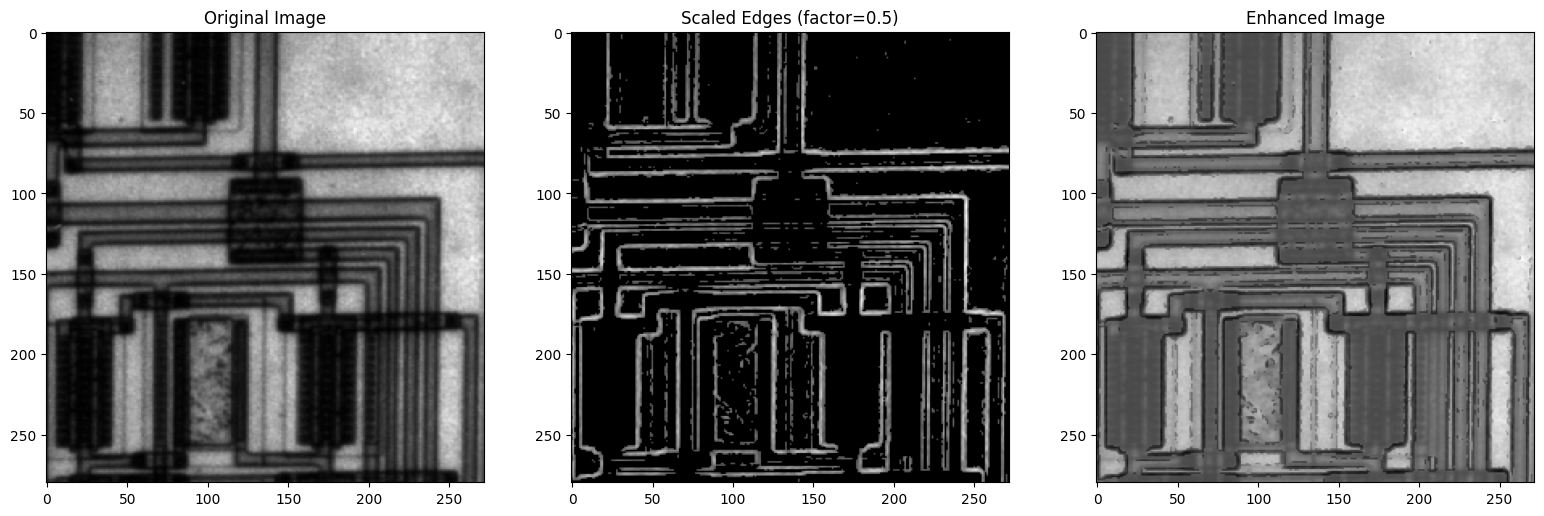

In [41]:
'''
Optional
1-Make edge detection
2-Multiply by factor < 1
3-Subtract (Orginal Image) - (Edge Detection Image)
'''

threshold = 0.3
factor = 0.5

_, _, G_thresh = sobel_edge_detection_gray(img, threshold=threshold)

scaled_edges = G_thresh * factor

enhanced = img.astype(float) - scaled_edges * 255 

show_images([img, scaled_edges, enhanced],
            ['Original Image', f'Scaled Edges (factor={factor})', 'Enhanced Image'])